<a href="https://colab.research.google.com/github/acarty9999/IDS-HW1/blob/main/project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REPORT**

1) **FOUR FUNCTIONS**

***makeDTModel***

Removed any row that had "?" to clean up data

Set the feature/target, used label enconding to encode data, and set my gini/entropy (cart/c5) classifiers.

***displayTree***

Filled parameters and called the function

***displayCM***

Created prediction test/train predicitons and plotted both of them

***compareModels***

Created/plotted side by side comparasions and this took the longest to 'render'/'load'.

## **Problem 2: R Code**



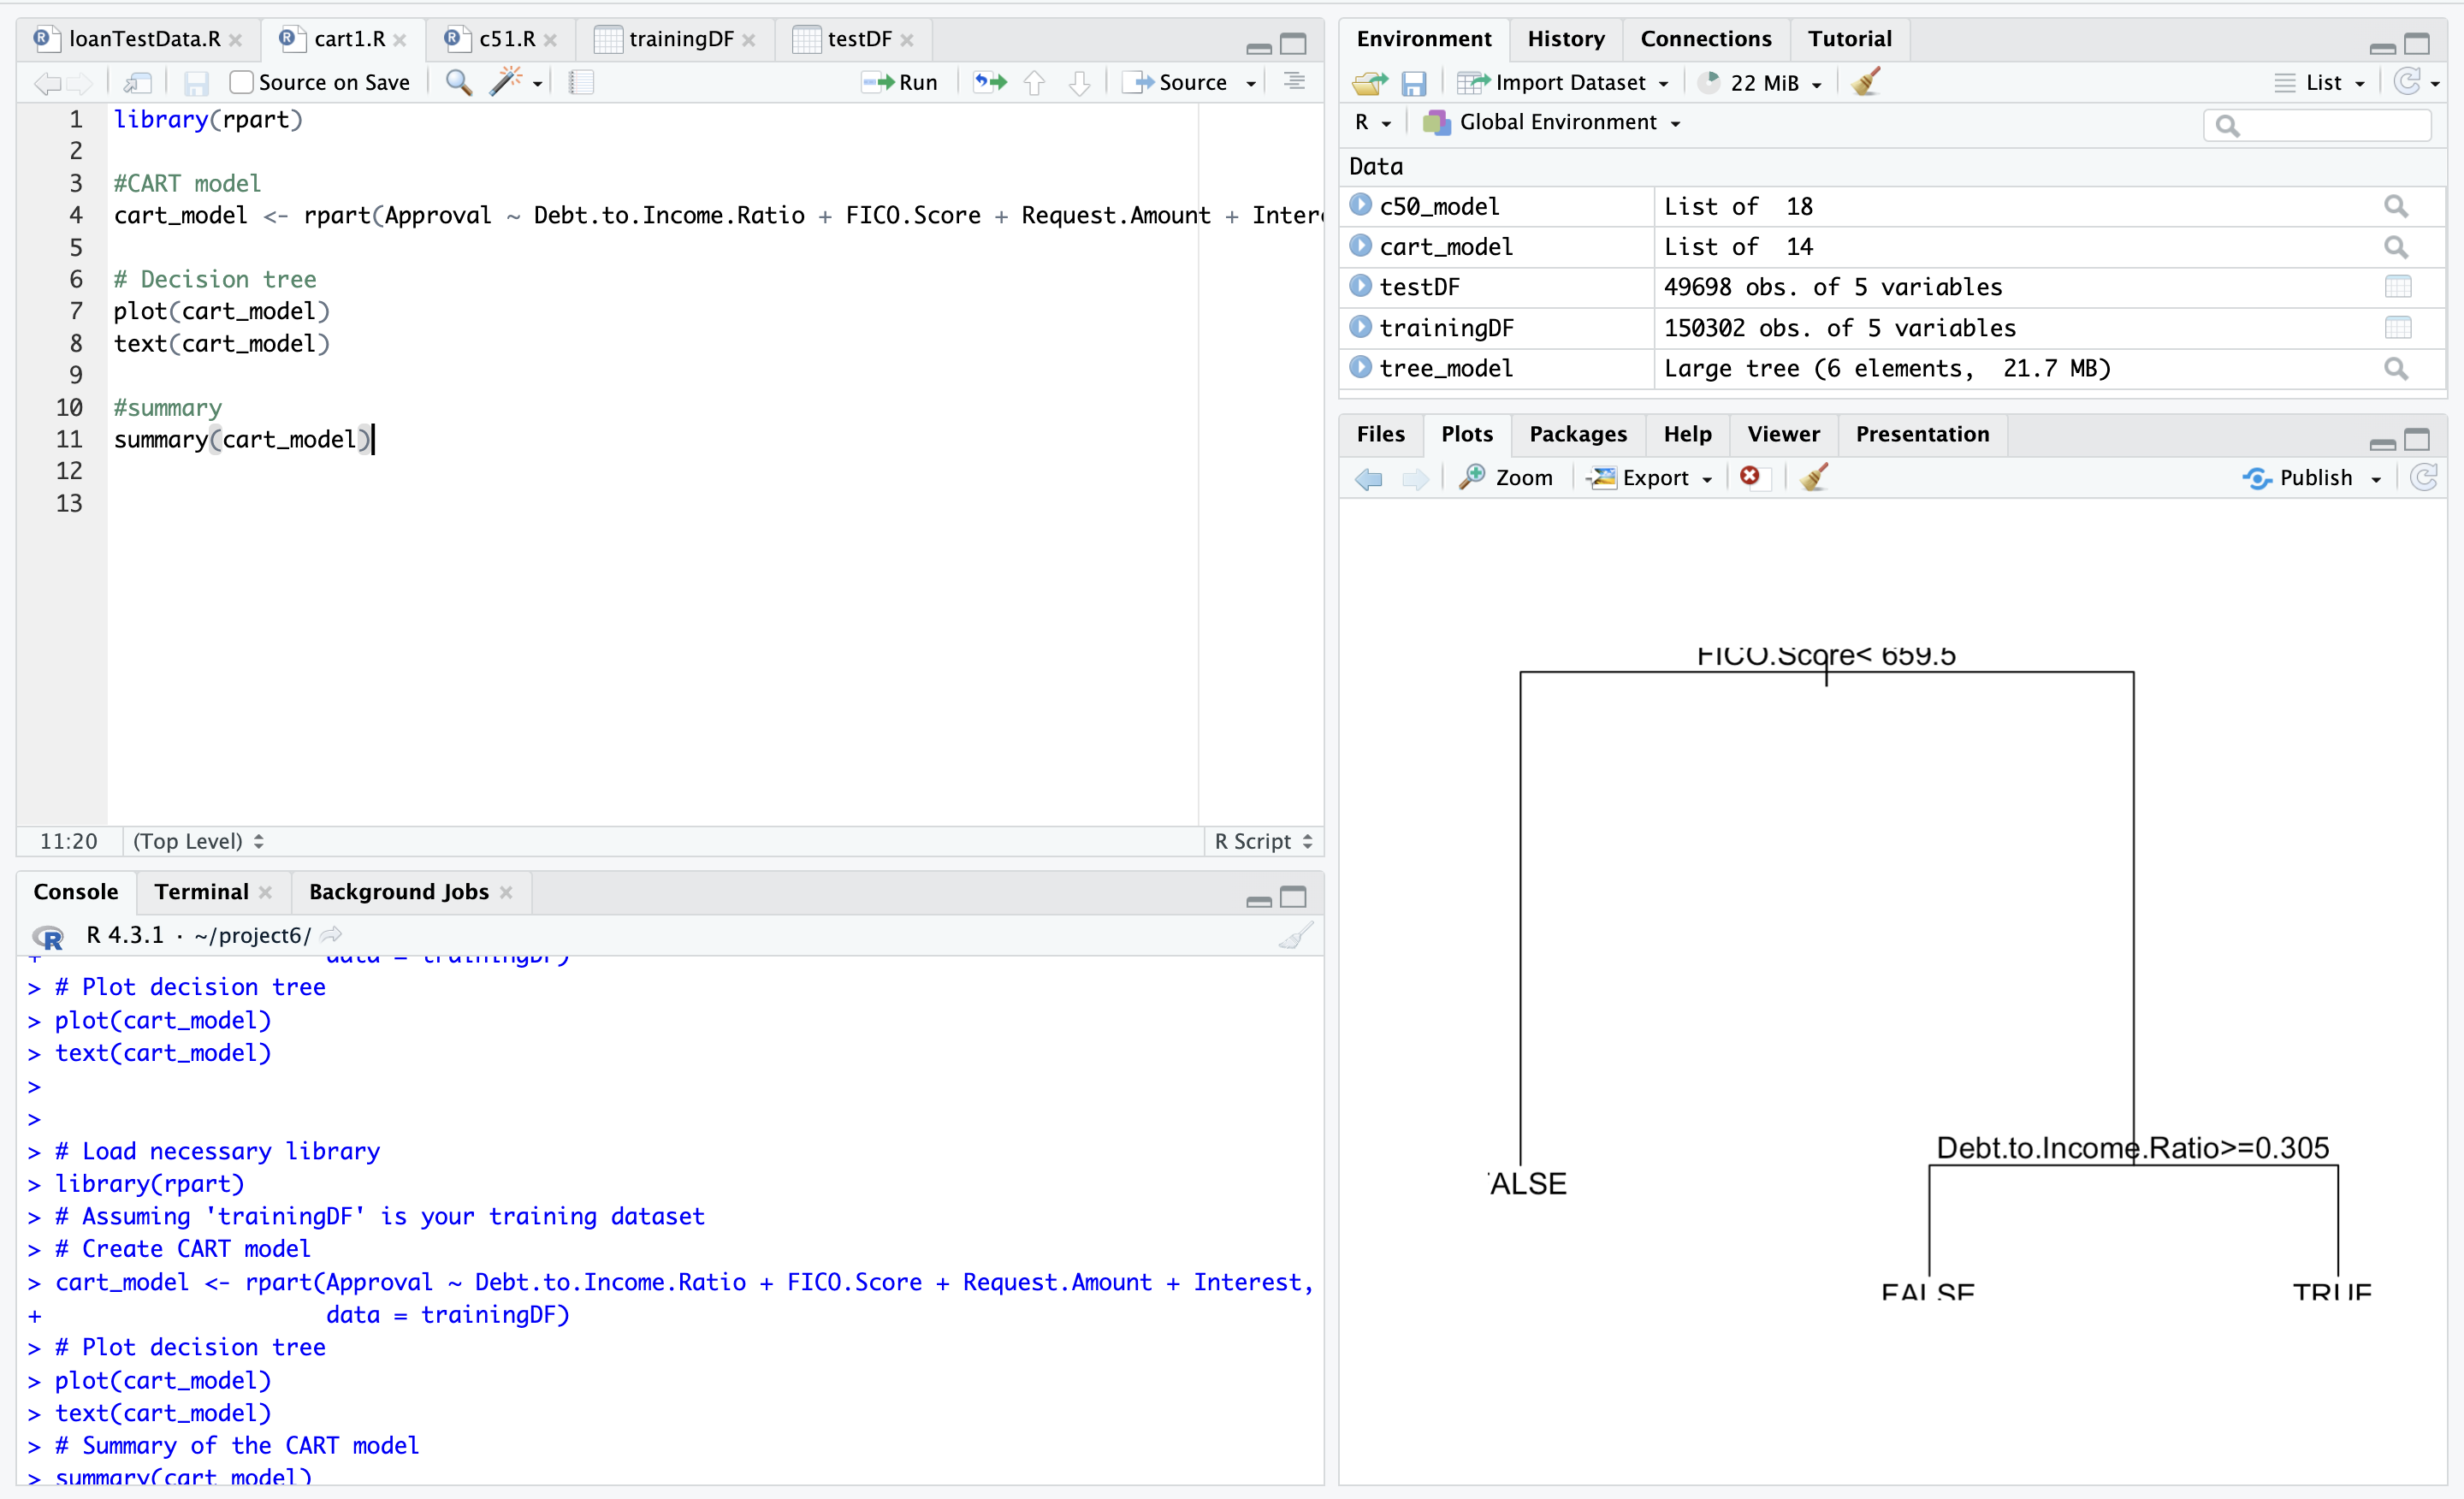

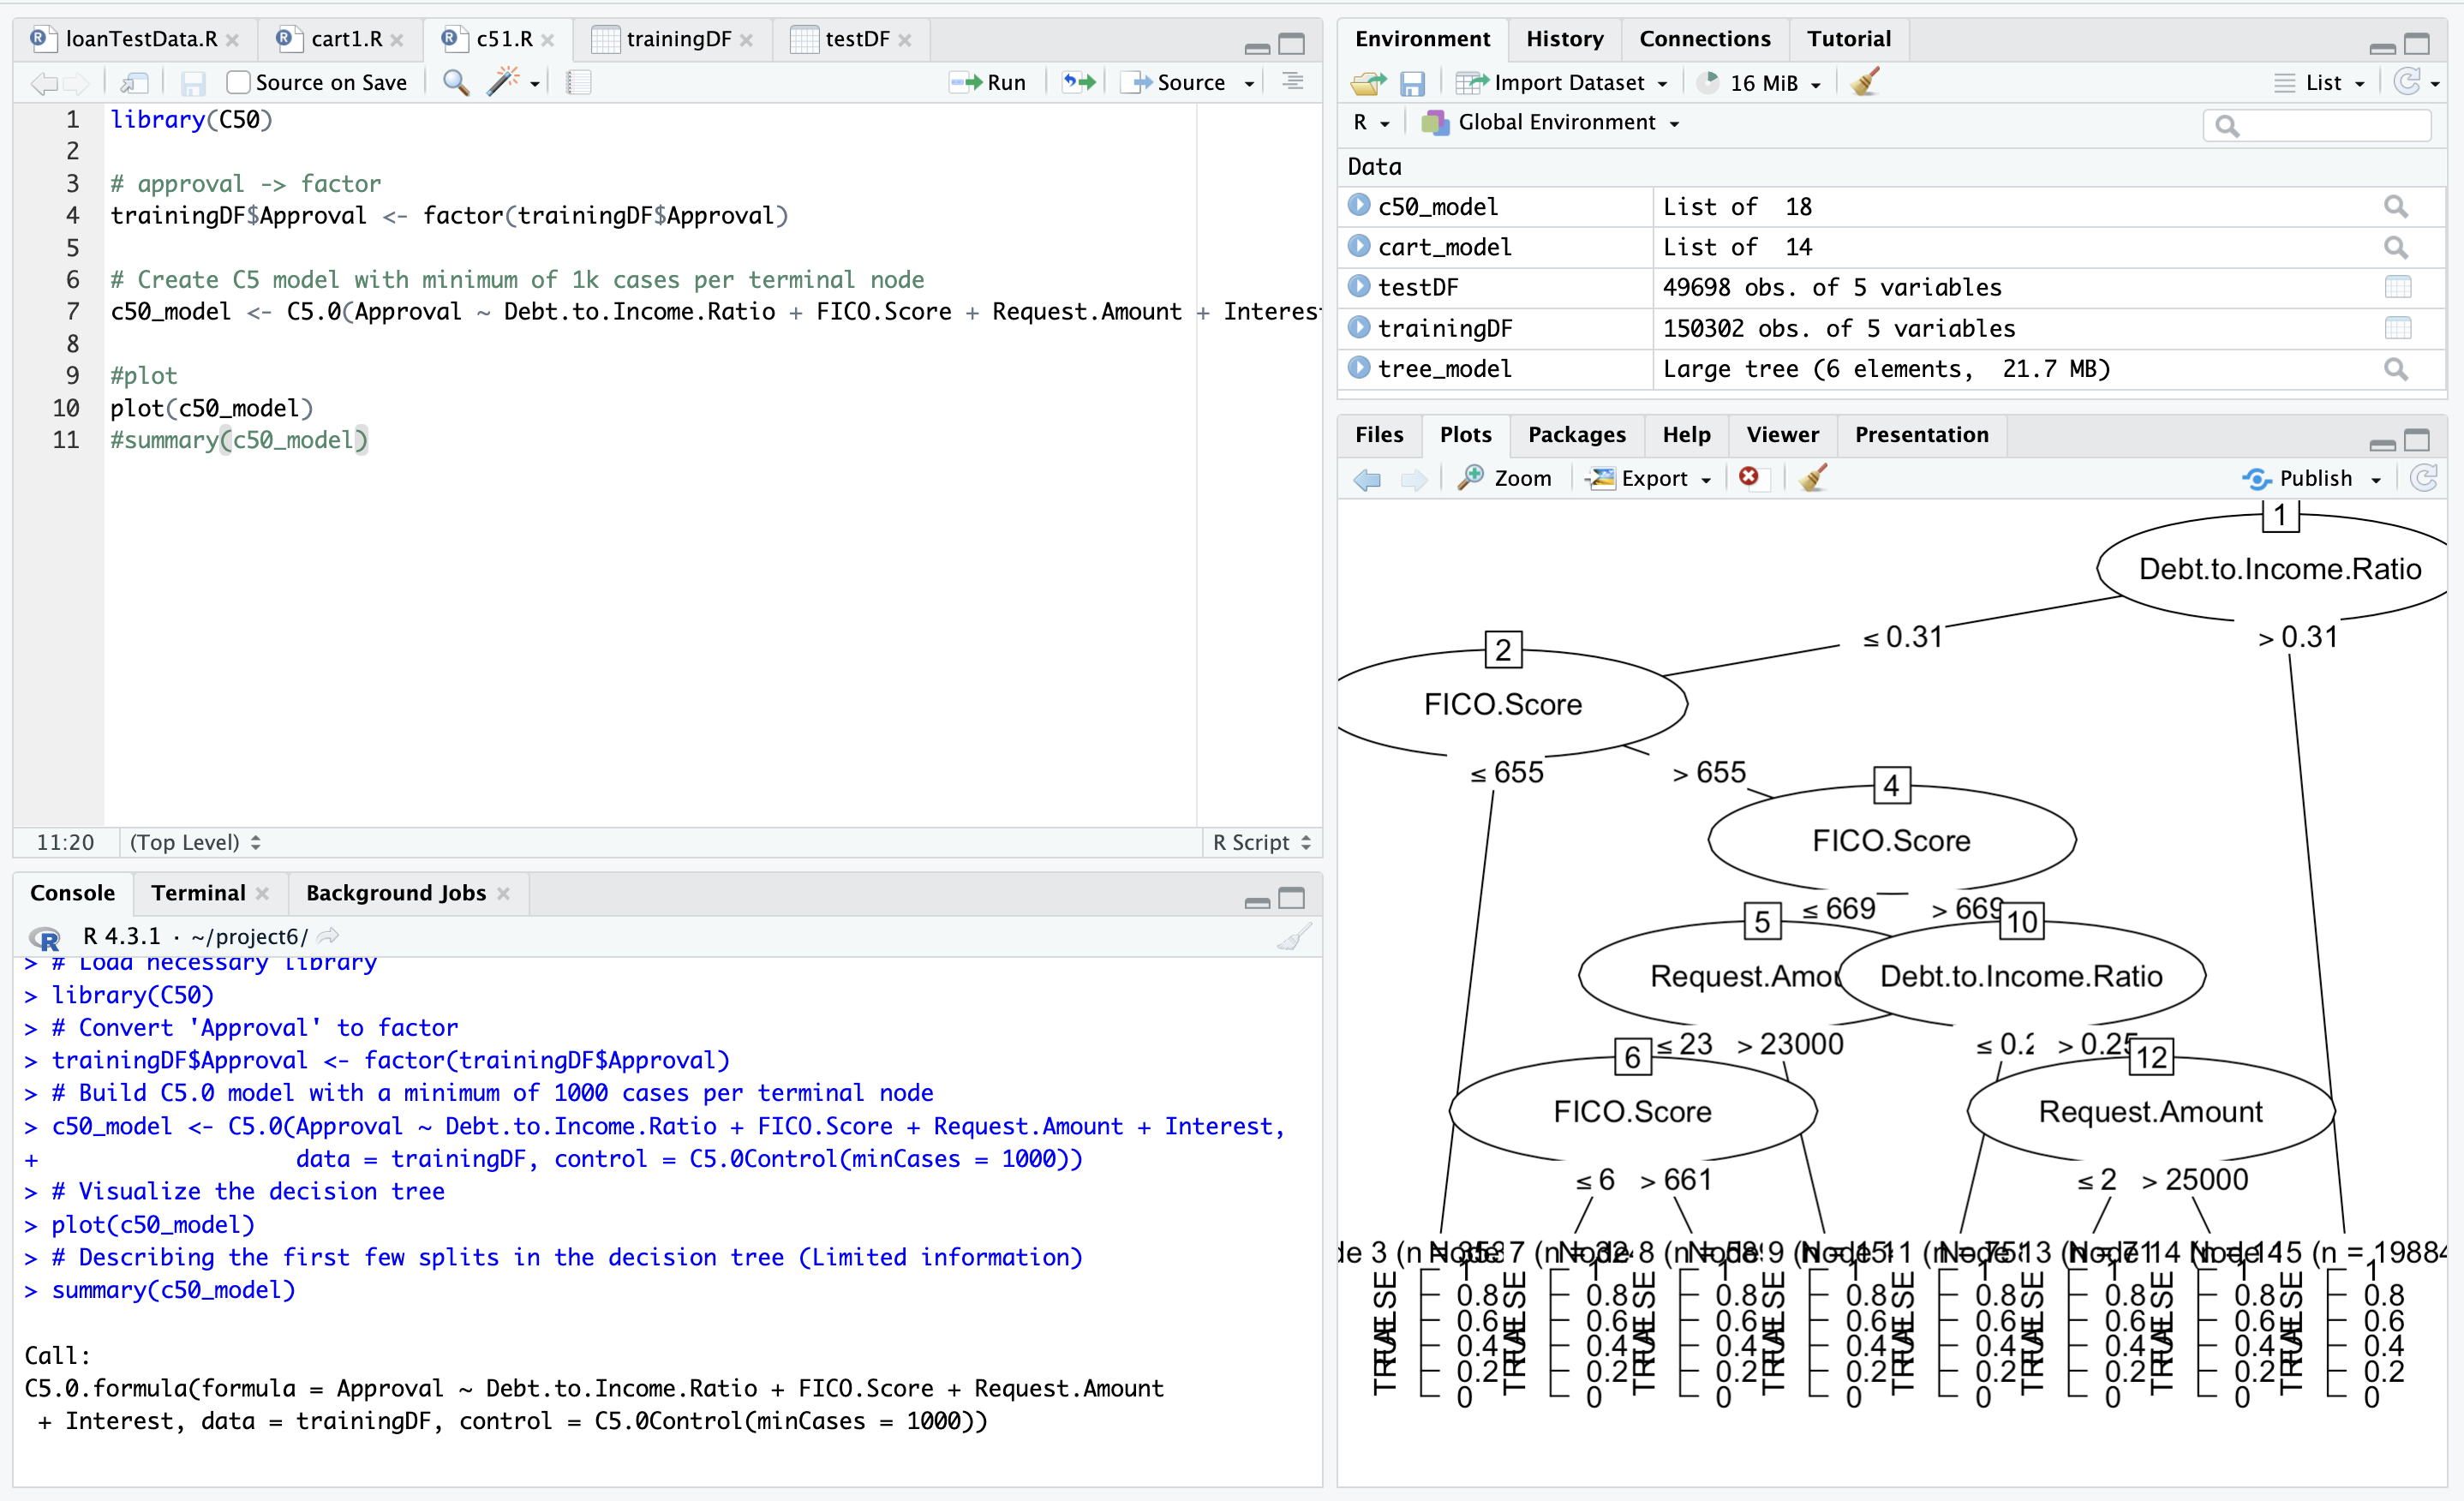

## **Problem 2 Questions**

### **1) Describe Splits**

**According to summary,**

FICO.Score, Debt-to-Income Ratio, Request Amount, and Interest (75k true, 75k false)

Criteria (44k true, 1k false)

Debt-to-Income Ratio, Request Amount, Interest, and FICO.Score (30k true, 73k false)

### **2) Describe Splits**

**According to sumamry,**

Debt-to-Income Ratio, FICO.Score (75k true, 75k false)

Debt-to-Income Ratio (44k false, 1k true)

Debt-to-Income Ratio, Request Amount, Interest, & FICO.Score (30k true, 73k false)


### **3) Similarties/Differences?**

C5 gives better predictions but CART is much more simplier and easier to grasp. C5 more complex/advanced and CART is straighforward.

## **CODE below**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# The adult_training dataset has several numeric and categoric predictors about adults, their
# occupation, marital status, economic status, financial status, etc.

adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

In [ ]:
# Cleaning data

#Replace "?" with NaN

adultDF.replace("?", np.nan, inplace=True)

# Drop anyy row with "NaN"
adultDF.dropna(inplace=True)

In [ ]:
# We will use Income as the target class in this exercise

adultDF.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def makeDTModel(criterion, X_train, y_train, max_depth=None, max_leaf_nodes=None):
    classifier = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
    classifier.fit(X_train, y_train)
    return classifier

#feature
X = adultDF.drop('income', axis=1)
#TARGET
y = adultDF['income']

# Encoding
le = LabelEncoder()
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'sex']
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Split into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train decision tree models
cart_classifier = makeDTModel("gini", X_train, y_train)
c5_classifier = makeDTModel("entropy", X_train, y_train)


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def displayTree(classifier, X):
    plt.figure(figsize=(10, 5))

    # Tree for gini
    plt.subplot(1, 2, 1)
    plot_tree(classifier['gini'], feature_names=X.columns, filled=True)
    plt.title('Gini Decision Tree')

    # Tree for entropy
    plt.subplot(1, 2, 2)
    plot_tree(classifier['entropy'], feature_names=X.columns, filled=True)
    plt.title('Entropy Decision Tree')

    plt.tight_layout()
    plt.show()

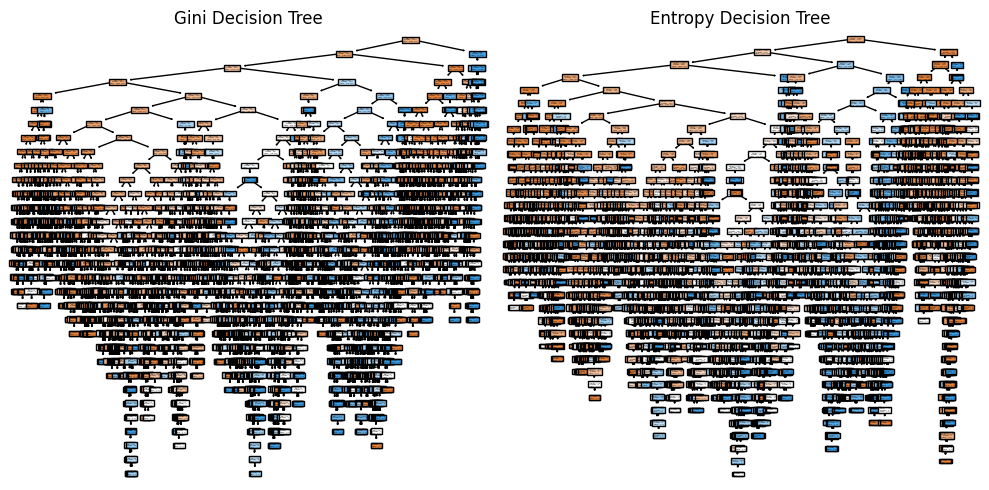

In [ ]:
displayTree({'gini': cart_classifier, 'entropy': c5_classifier}, adultDF)



In [ ]:
from sklearn.metrics import confusion_matrix

def displayCM(classifier, X_train, y_train, X_test, y_test):

    # Train_predictions
    train_predictions = classifier.predict(X_train)
    train_cm = confusion_matrix(y_train, train_predictions)

    # Test_predictions
    test_predictions = classifier.predict(X_test)
    test_cm = confusion_matrix(y_test, test_predictions)

    #Plot
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix - Training Data')

    plt.subplot(1, 2, 2)
    sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix - Testing Data')

    plt.tight_layout()
    plt.show()


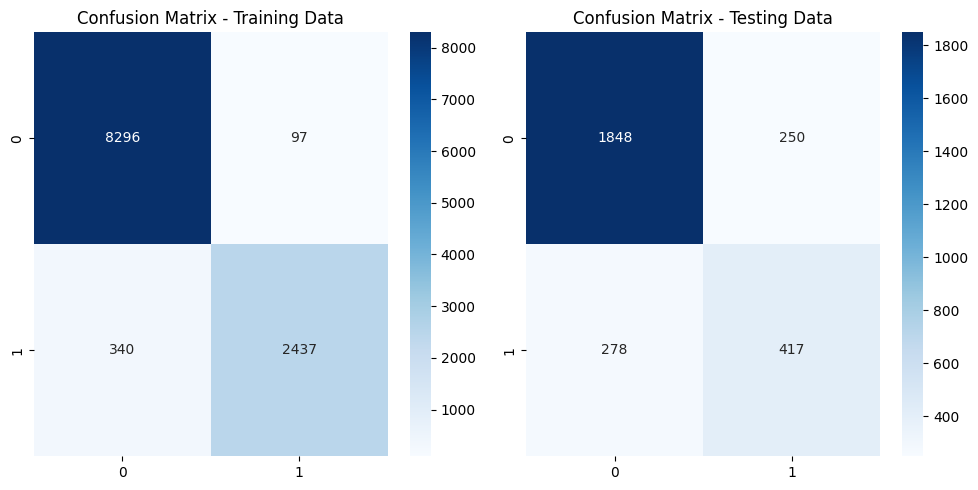

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

displayCM(c5_classifier, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.tree import plot_tree

def compareModels(cart_model, c5_model, X):
    plt.figure(figsize=(10, 5))

    # CART Decision Tree
    plt.subplot(1, 2, 1)
    plot_tree(cart_model, feature_names=X.columns, filled=True)
    plt.title('CART Decision Tree')

    # C5.0 Decision Tree
    plt.subplot(1, 2, 2)
    plot_tree(c5_model, feature_names=X.columns, filled=True)
    plt.title('C5.0 Decision Tree')

    plt.tight_layout()
    plt.show()


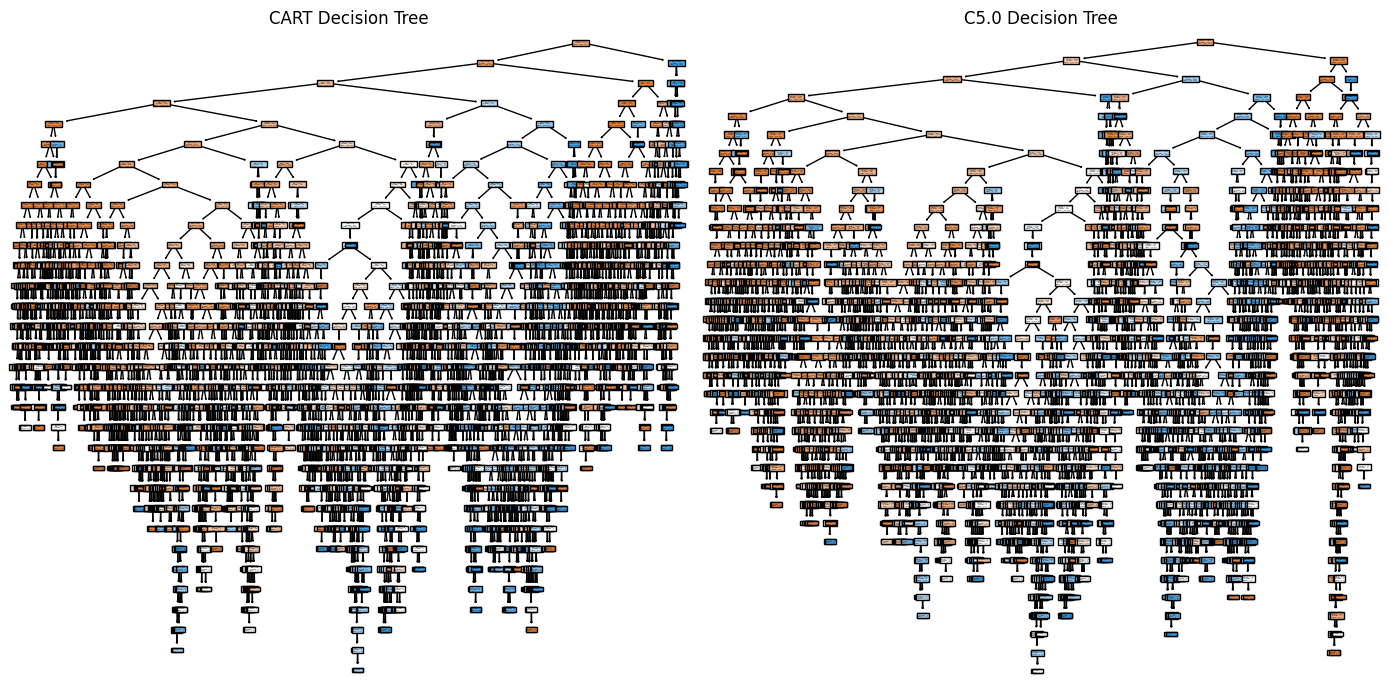

In [ ]:
compareModels(cart_classifier, c5_classifier, adultDF)